## Day 77 Lecture 1 Assignment

In this assignment, we will learn about convolutions using Dask arrays.

In [ ]:
!pip install dask[complete]  --quiet

     |████████████████████████████████| 675kB 5.8MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
ERROR: distributed 2020.12.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2020.12.0 has requirement dask>=2020.12.0, but you'll have dask 2.12.0 which is incompatible.


In [ ]:
import dask.array as da

In [ ]:
import os
import random

import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = cv2.imread('/content/drive/MyDrive/Data/Big Data/Dask Arrays Convolutions/6-facial-recognition-hero.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
image.shape

(1360, 2040)

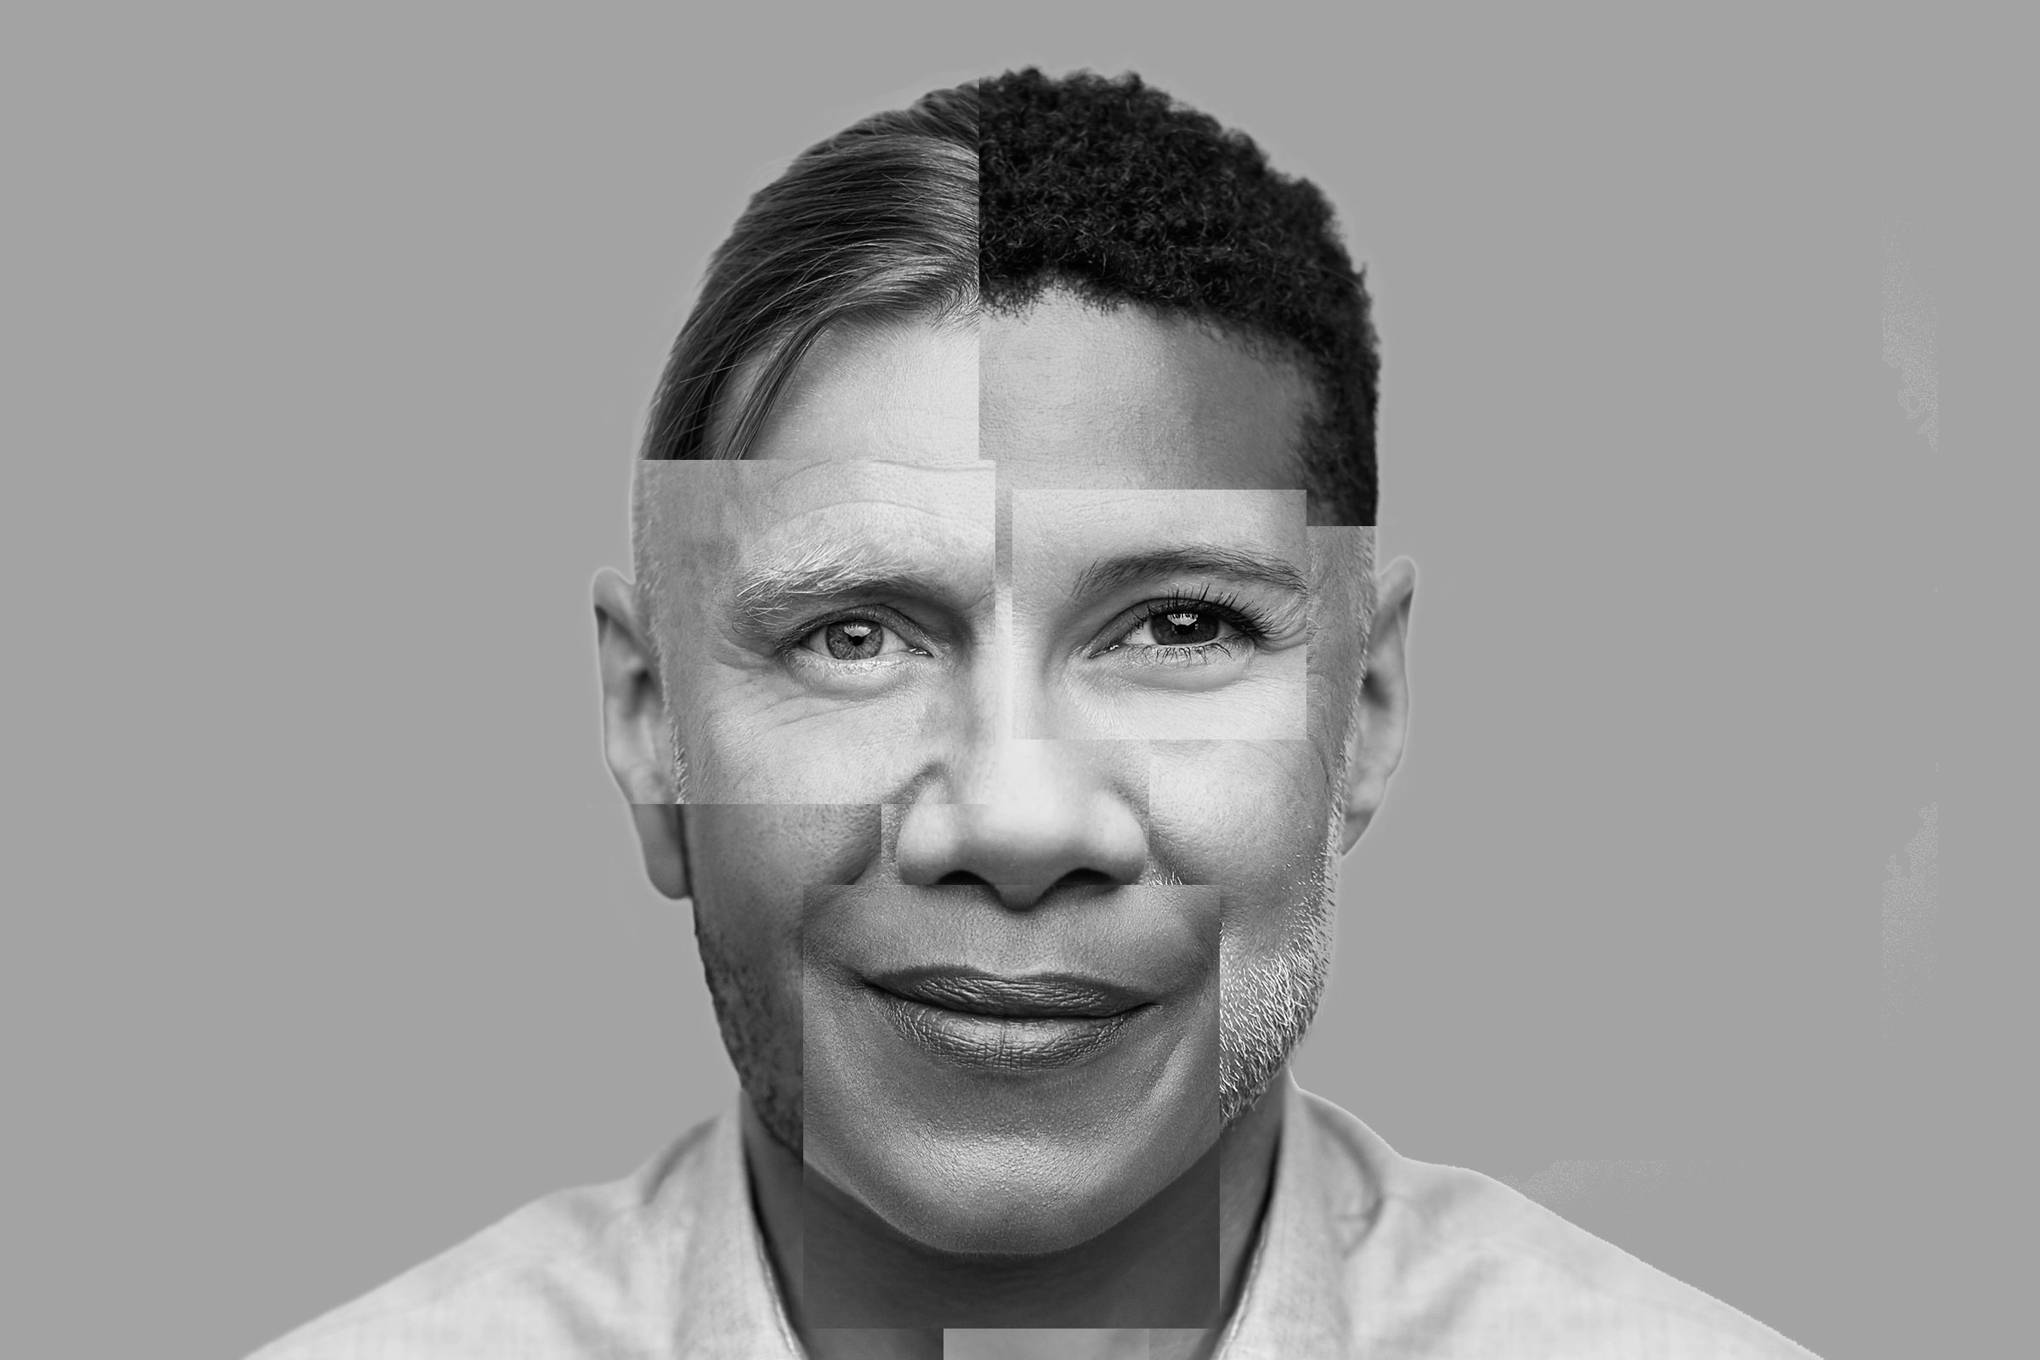

In [ ]:
cv2_imshow(image)

In [ ]:
image_da = da.asarray(image)

In [ ]:
image_da

dask.array<array, shape=(1360, 2040), dtype=uint8, chunksize=(1360, 2040), chunktype=numpy.ndarray>

Rechunk the image array into chunks of 100x100.

In [ ]:
# Answer below
image_chunked = da.rechunk(image_da, chunks=(100,100))
image_chunked.chunks

((100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 60),
 (100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  40))

In [ ]:
image_chunked

dask.array<rechunk-merge, shape=(1360, 2040), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

In the code above, we read an image of a face and converted it into a Dask array. We will use this array to learn about convolutions. You can learn more about convolutions <a href="http://setosa.io/ev/image-kernels/">here</a>.

Convolutions are transformations of matrices that help us create convolutional neural network (which are crucial in deep learning) or apply effects to images like blurring or sharpening.

Our kernel is a 3x3 matrix which we apply to every 3x3 subset of our image matrix.

To start with our transformation, zero pad the image matrix with a width of one. This means that our output will be a matrix with an additional row and additional column of zeros on both sides. The image below illustrates padding. Use the pad function 
<img src="https://www.researchgate.net/profile/Terje_Midtbo/publication/318967374/figure/fig4/AS:669210783002634@1536563692382/Visualization-of-a-matrix-that-is-zero-padded-with-one-border.png">

In [ ]:
# Answer below:

image_pad = np.pad(image_chunked, ((1,1),(1,1)), 'constant')
image_pad

dask.array<concatenate, shape=(1362, 2042), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

What is the shape of our padded array?

In [ ]:
# Answer below:
image_pad.shape

dask.array<concatenate, shape=(1362, 2042), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

(1362, 2042)

To apply a convolution, we will install the `dask-image` package. Do this below.

In [ ]:
# Answer below:
!pip install dask-image --quiet


     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 92kB 2.9MB/s 


Import the convolve function from the package

In [ ]:
# Answer below:
from dask_image.ndfilters import convolve



Define the sharpen convolution from the setosa.io article mentioned above. Apply the convolution to our padded image.

In [ ]:
# Answer below:
sharpen = da.from_array(np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]]),
                    chunks=(3,3))

sharpened_image = convolve(image_pad,sharpen).compute()

In [ ]:
sharpened_image.shape

(1362, 2042)

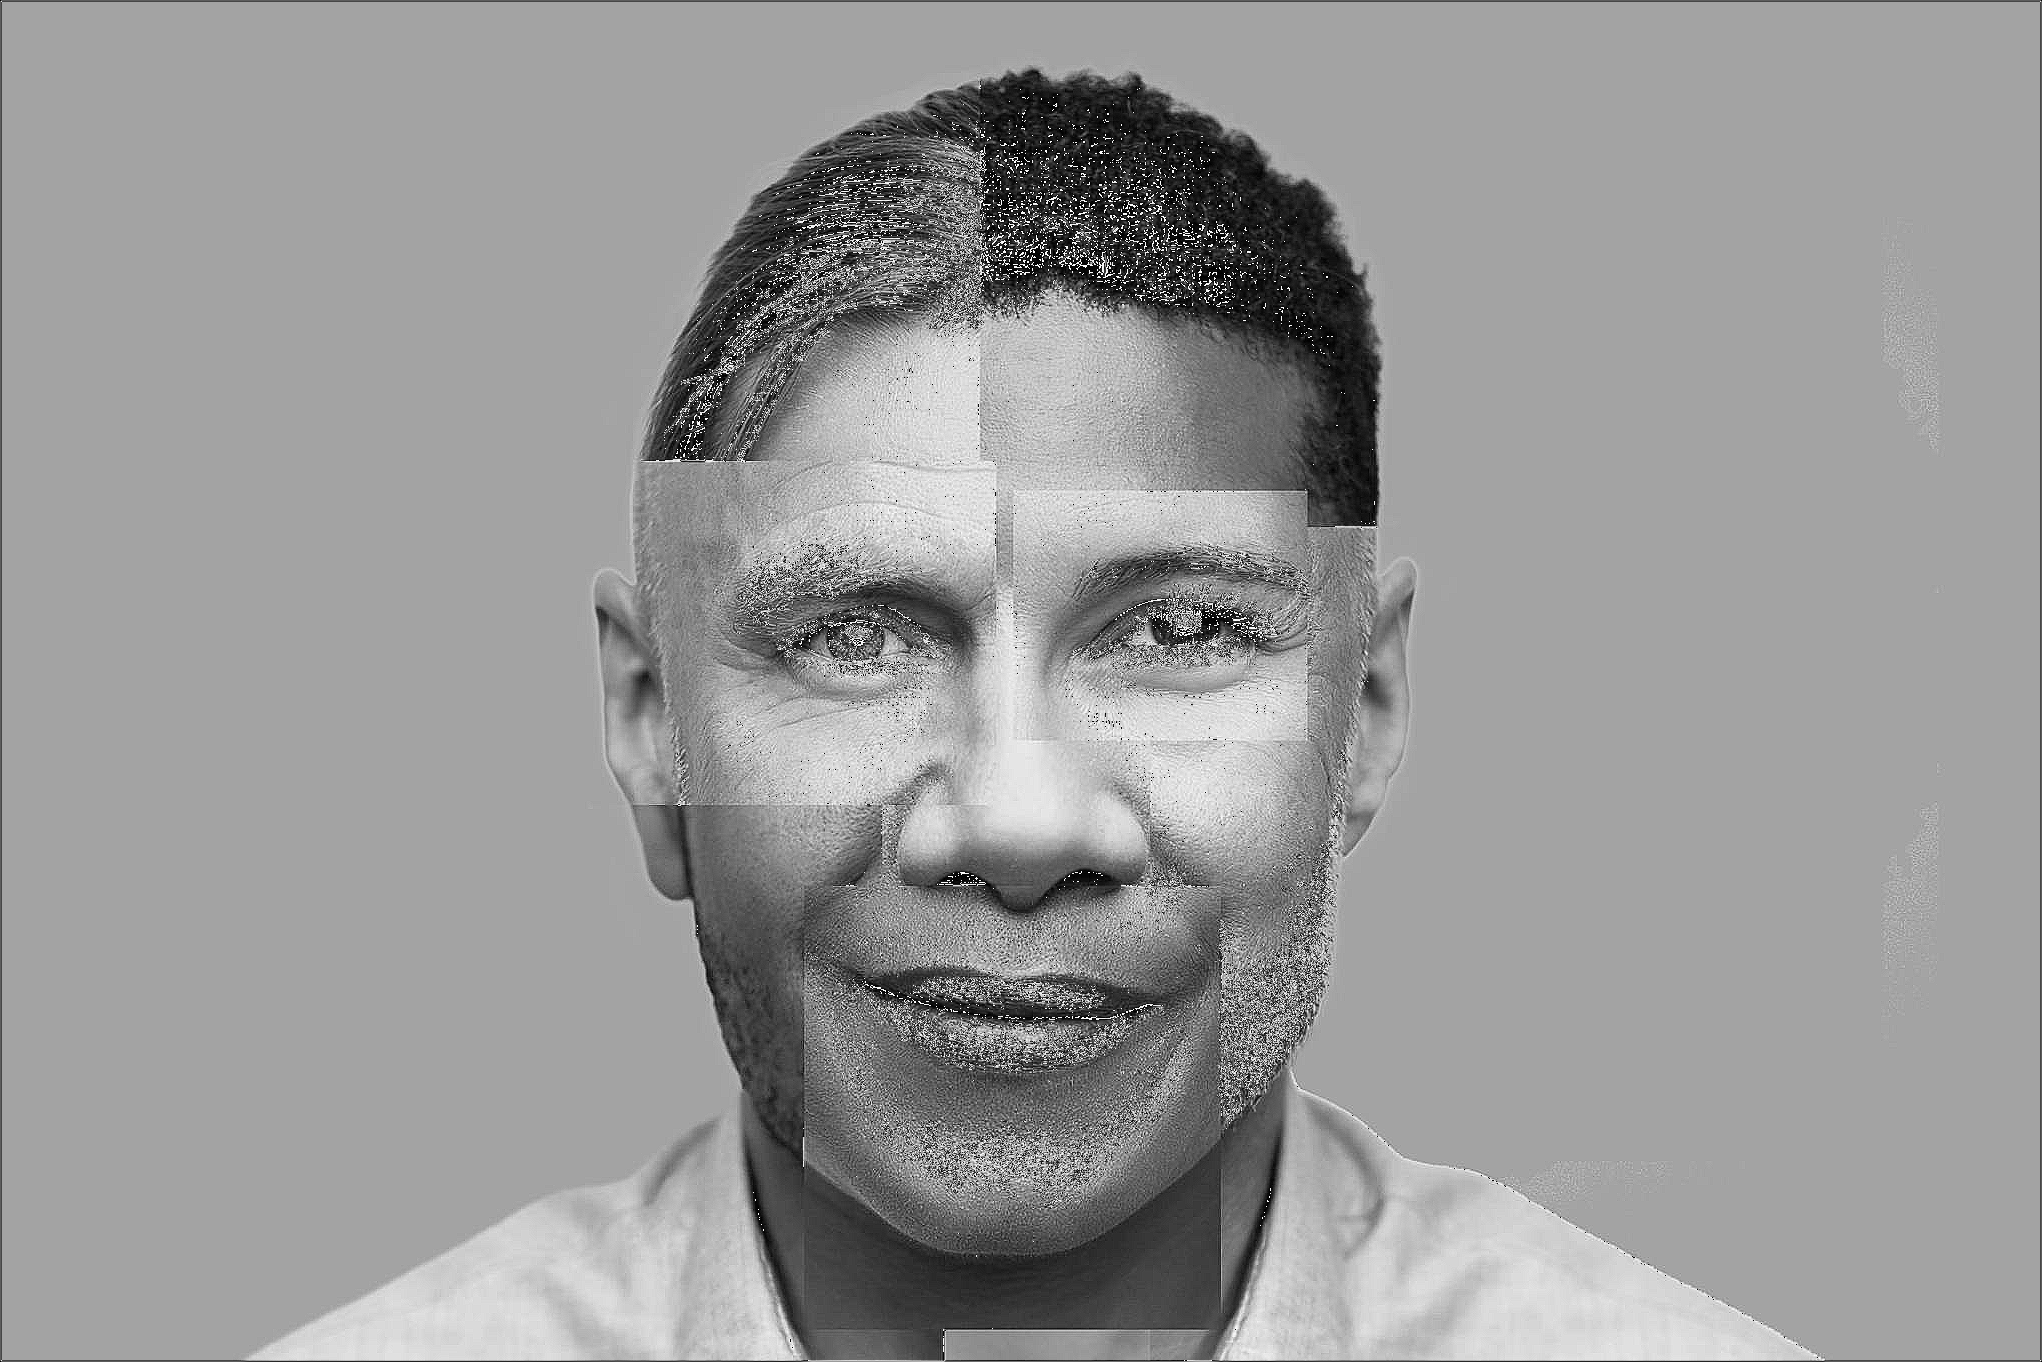

In [ ]:
cv2_imshow(sharpened_image)